In [1]:
import tensorflow as tf
from IPython.display import Image, display

def get_class(image_path):                
    display(Image(filename=image_path))
    
    # Read in the image_data
    image_data = tf.gfile.FastGFile(image_path, 'rb').read()

    # Loads label file, strips off carriage return
    label_lines = [line.rstrip() for line
                   in tf.gfile.GFile("/notebooks/coscup/part3/retrained_labels.txt")]

    # Unpersists graph from file
    with tf.gfile.FastGFile("/notebooks/coscup/part3/retrained_graph.pb", 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(graph_def, name='')

    with tf.Session() as sess:
        # Feed the image_data as input to the graph and get first prediction
        softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')

        predictions = sess.run(softmax_tensor,
                               {'DecodeJpeg/contents:0': image_data})

        # Sort to show labels of first prediction in order of confidence
        top_k = predictions[0].argsort()[-len(predictions[0]):][::-1]

        for node_id in top_k:
            human_string = label_lines[node_id]
            score = predictions[0][node_id]
            print('%s (score = %.5f)' % (human_string, score))


/notebooks/coscup/part3/photos_test/gyromitra/n13037406_11338.JPEG


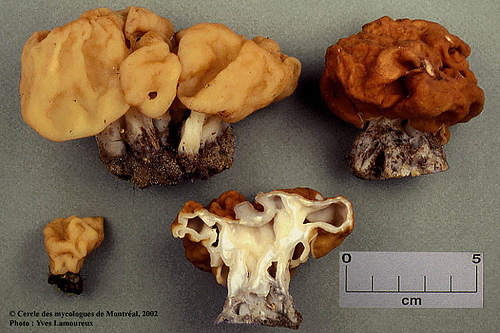

gyromitra (score = 0.99655)
hen of the woods hen of the woods polyporus frondosus grifola frondosa (score = 0.00101)
peanut (score = 0.00083)
earthstar (score = 0.00069)
bolete (score = 0.00040)
coral fungus (score = 0.00035)
stinkhorn carrion fungus (score = 0.00005)
buckeye horse chestnut conker (score = 0.00005)
toilet tissue toilet paper bathroom tissue (score = 0.00004)
agaric (score = 0.00002)
ear spike capitulum (score = 0.00001)


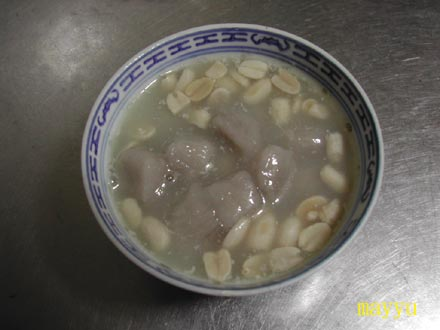

peanut (score = 0.76955)
ear spike capitulum (score = 0.16502)
bolete (score = 0.01475)
earthstar (score = 0.01010)
buckeye horse chestnut conker (score = 0.00938)
toilet tissue toilet paper bathroom tissue (score = 0.00830)
hen of the woods hen of the woods polyporus frondosus grifola frondosa (score = 0.00667)
stinkhorn carrion fungus (score = 0.00613)
gyromitra (score = 0.00557)
agaric (score = 0.00291)
coral fungus (score = 0.00161)


In [3]:
import os
import random

filesList = []
for dirPath, dirNames, fileNames in os.walk("/notebooks/coscup/part3/photos_test"):
    filesList += [os.path.join(dirPath, f) for f in fileNames if ".@__thumb" not in os.path.join(dirPath, f)]

target_file = random.choice(filesList)

print target_file

get_class(target_file)
get_class('/notebooks/coscup/part3/photos_test/peanut.jpg')